In [1]:
!unzip "titanic.zip"

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
training_data = pd.read_csv('./train.csv')
print(len(training_data))
print(len(training_data.columns))
print(training_data.columns)
training_data.head()

891
12
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data =pd.read_csv('./test.csv')
print(len(test_data))
test_data.head()

418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
def check_for_null_values(data : pd.DataFrame):
    columns_to_remove = []
    for column in data.columns:
        nr_null_values = data[column].isna().sum()
        print("Coloana", column, "are un numar de elemente nule:", nr_null_values)
        if (nr_null_values > len(data) // 2):
            columns_to_remove.append(column)
    return columns_to_remove

def eliminate_null_values(data : pd.DataFrame):
    data['Embarked'] = data['Embarked'].fillna("A")
    data['Age'] = data['Age'].fillna(data['Age'].mean().astype(int))
    data['Fare'] = data['Fare'].fillna(data['Fare'].mean().astype(int))
    return data

def modify_data_to_number(data : pd.DataFrame):
    data['Sex'] = data['Sex'].replace({"male": 5, "female": 6}).astype(int)
    data['Embarked'] = data['Embarked'].replace({"A":65, "C": 67, "Q": 81, "S": 83}).astype(int)
    return data


In [6]:
training_data = pd.read_csv('./train.csv')
training_data = training_data.drop(['Name', 'PassengerId', 'Ticket'], axis=1)
columns_to_remove = check_for_null_values(training_data)
print("Coloane care vor trebui sterse:", columns_to_remove)
training_data = training_data.drop(columns_to_remove, axis=1)
print("Dimensiune set de date:", len(training_data))
training_data = eliminate_null_values(training_data)
training_data = modify_data_to_number(training_data)
training_data_labels = training_data['Survived']
training_data = training_data.drop('Survived', axis=1)
training_data.head()

Coloana Survived are un numar de elemente nule: 0
Coloana Pclass are un numar de elemente nule: 0
Coloana Sex are un numar de elemente nule: 0
Coloana Age are un numar de elemente nule: 177
Coloana SibSp are un numar de elemente nule: 0
Coloana Parch are un numar de elemente nule: 0
Coloana Fare are un numar de elemente nule: 0
Coloana Cabin are un numar de elemente nule: 687
Coloana Embarked are un numar de elemente nule: 2
Coloane care vor trebui sterse: ['Cabin']
Dimensiune set de date: 891


<ipython-input-5-d960ba45c4fc>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({"male": 5, "female": 6}).astype(int)
<ipython-input-5-d960ba45c4fc>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Embarked'] = data['Embarked'].replace({"A":65, "C": 67, "Q": 81, "S": 83}).astype(int)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,5,22.0,1,0,7.2500,83
1,1,6,38.0,1,0,71.2833,67
2,3,6,26.0,0,0,7.9250,83
3,1,6,35.0,1,0,53.1000,83
4,3,5,35.0,0,0,8.0500,83


In [7]:
test_data =pd.read_csv('./test.csv')
test_data = test_data.drop(['Name', 'PassengerId', 'Ticket'], axis=1)
columns_to_remove = check_for_null_values(test_data)
print("Coloane care vor trebui sterse:", columns_to_remove)
test_data = test_data.drop(columns_to_remove, axis=1)
print(len(test_data))
test_data = eliminate_null_values(test_data)
test_data = modify_data_to_number(test_data)
test_data_labels = pd.read_csv('./gender_submission.csv')['Survived']
test_data.head()

Coloana Pclass are un numar de elemente nule: 0
Coloana Sex are un numar de elemente nule: 0
Coloana Age are un numar de elemente nule: 86
Coloana SibSp are un numar de elemente nule: 0
Coloana Parch are un numar de elemente nule: 0
Coloana Fare are un numar de elemente nule: 1
Coloana Cabin are un numar de elemente nule: 327
Coloana Embarked are un numar de elemente nule: 0
Coloane care vor trebui sterse: ['Cabin']
418


<ipython-input-5-d960ba45c4fc>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({"male": 5, "female": 6}).astype(int)
<ipython-input-5-d960ba45c4fc>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Embarked'] = data['Embarked'].replace({"A":65, "C": 67, "Q": 81, "S": 83}).astype(int)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,5,34.5,0,0,7.8292,81
1,3,6,47.0,1,0,7.0000,83
2,2,5,62.0,0,0,9.6875,81
3,3,5,27.0,0,0,8.6625,83
4,3,6,22.0,1,1,12.2875,83


In [8]:
import functools
import random

BEST_MODEL_NUMBER = 1
CONFIDENCE = 0.96

def add_work_done(parameters, X_train, y_train, X_test, y_test, create_model):
    model = create_model(parameters)
    trained_model = model.fit(X_train, y_train)
    predictions = trained_model.predict(X_test)
    acc = accuracy_score(predictions, y_test)
    print(parameters, f"Test Accuracy: {acc:.2f}")
    return trained_model, acc

def parameter_sets_equal(param1, param2):
    for key in param1.keys():
        if param1[key] != param2[key]: return False
    return True

def compute_next_parameters(all_parameters):
    dictionary = {}
    for key in all_parameters.keys():
        dictionary[key] = random.choice(all_parameters[key])
    return dictionary

def nr_models_for_certainty(nr_models, nr_best_models):
    out = np.array([1.0])
    for i in range(nr_models):
        out *= (nr_models - nr_best_models - i) / nr_models
        if (1 - out > CONFIDENCE): return i
    return i

def all_models_paramters(all_parameters):
    max_nr_models = functools.reduce(lambda a, b: a * b, list(map(lambda x: len(x), all_parameters.values())))
    nr_models_neccesary = nr_models_for_certainty(max_nr_models, BEST_MODEL_NUMBER)
    print("There will be ", nr_models_neccesary, "for certainty of ", CONFIDENCE, " that we found the right one.")
    parameters_list = [compute_next_parameters(all_parameters)]
    for i in range(nr_models_neccesary - 1):
        while(1):
            current_param = compute_next_parameters(all_parameters)
            foundParameters = False
            for param in parameters_list:
                if (not parameter_sets_equal(current_param, param)):
                    foundParameters = True
                    break
            if foundParameters:
                parameters_list.append(current_param)
                break
    return parameters_list

def compute_accuracy_for_all_models(all_parameters, create_model):
    models_parameters = all_models_paramters(all_parameters)
    best_accuracy = 0
    best_model = None
    best_parameters = None
    for parameters in models_parameters:
        trained_model, accurracy = add_work_done(parameters, training_data,
                        training_data_labels, test_data, test_data_labels, create_model)
        print(accurracy)
        if (accurracy > best_accuracy):
            best_model = trained_model
            best_accuracy = accurracy
            best_parameters = parameters
            print("Acuratete pe test:", best_model.score(test_data, test_data_labels))
    return best_model, best_parameters, best_accuracy

def evaluate_model(grid, create_model):
    best_model, best_parameters, best_accuracy = compute_accuracy_for_all_models(grid, create_model)
    print("Best parameters are: ", best_parameters)
    print("Best accuracy is: ", best_accuracy)

    clf = create_model(best_parameters)
    clf.fit(training_data, training_data_labels)
    predictions = clf.predict(training_data)
    accuracy = accuracy_score(training_data_labels, predictions)
    print("Accuracy:", accuracy)
    f1 = f1_score(training_data_labels, predictions)
    print("F1 score:", f1)
    recall = recall_score(training_data_labels, predictions)
    print("Recall:", recall)
    precision = precision_score(training_data_labels, predictions)
    print("Precision:", precision)
    matrix = confusion_matrix(training_data_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=clf.classes_)
    disp.plot()
    plt.show()

    print("Testing results:")
    predictions = clf.predict(test_data)
    accuracy = accuracy_score(test_data_labels, predictions)
    print("Accuracy:", accuracy)
    f1 = f1_score(test_data_labels, predictions)
    print("F1 score:", f1)
    recall = recall_score(test_data_labels, predictions)
    print("Recall:", recall)
    precision = precision_score(test_data_labels, predictions)
    print("Precision:", precision)
    matrix = confusion_matrix(test_data_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=clf.classes_)
    disp.plot()
    plt.show()


There will be  41 for certainty of  0.96  that we found the right one.
{'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'entropy'} Test Accuracy: 0.87
0.8708133971291866
Acuratete pe test: 0.8708133971291866
{'n_estimators': 1000, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'criterion': 'entropy'} Test Accuracy: 0.85
0.854066985645933
{'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4, 'criterion': 'gini'} Test Accuracy: 0.92
0.9186602870813397
Acuratete pe test: 0.9186602870813397
{'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 4, 'criterion': 'entropy'} Test Accuracy: 0.90
0.8971291866028708
{'n_estimators': 1000, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 1, 'criterion': 'gini'} Test Accuracy: 0.85
0.854066985645933
{'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'} Test Acc

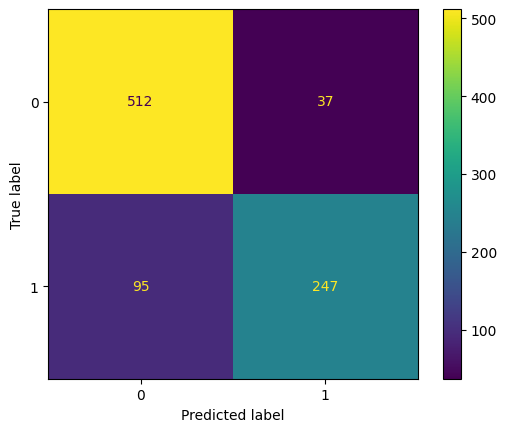

Testing results:
Accuracy: 0.9330143540669856
F1 score: 0.9047619047619048
Recall: 0.875
Precision: 0.9366197183098591


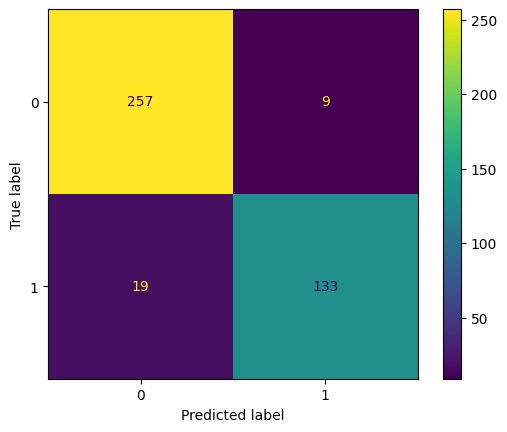

In [9]:

grid_random_forest = {
      'n_estimators': [100, 200, 500, 1000],
      'max_depth' : [2,4,5,10],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
      'criterion': ["gini", "entropy"],
    }

def create_random_forest_model(parameters):
    return RandomForestClassifier(n_estimators=parameters['n_estimators'],
                                  max_depth=parameters['max_depth'],
                                  min_samples_split=parameters['min_samples_split'],
                                  min_samples_leaf=parameters['min_samples_leaf'],
                                  criterion=parameters['criterion'])

evaluate_model(grid_random_forest, create_random_forest_model)

There will be  41 for certainty of  0.96  that we found the right one.
{'n_neighbors': 7, 'leaf_size': 20, 'weights': 'uniform', 'algorithm': 'auto'} Test Accuracy: 0.66
0.6578947368421053
Acuratete pe test: 0.6578947368421053
{'n_neighbors': 3, 'leaf_size': 15, 'weights': 'uniform', 'algorithm': 'brute'} Test Accuracy: 0.63
0.6339712918660287
{'n_neighbors': 10, 'leaf_size': 20, 'weights': 'uniform', 'algorithm': 'ball_tree'} Test Accuracy: 0.65
0.6507177033492823
{'n_neighbors': 12, 'leaf_size': 20, 'weights': 'distance', 'algorithm': 'brute'} Test Accuracy: 0.64
0.6411483253588517
{'n_neighbors': 7, 'leaf_size': 60, 'weights': 'uniform', 'algorithm': 'kd_tree'} Test Accuracy: 0.66
0.6578947368421053
{'n_neighbors': 5, 'leaf_size': 40, 'weights': 'uniform', 'algorithm': 'brute'} Test Accuracy: 0.65
0.645933014354067
{'n_neighbors': 12, 'leaf_size': 20, 'weights': 'uniform', 'algorithm': 'ball_tree'} Test Accuracy: 0.65
0.645933014354067
{'n_neighbors': 12, 'leaf_size': 60, 'weights':

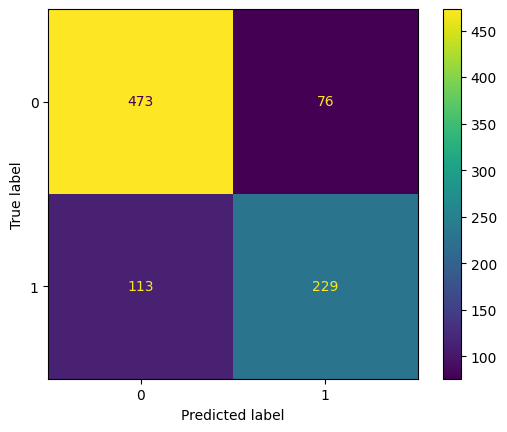

Testing results:
Accuracy: 0.6578947368421053
F1 score: 0.5119453924914675
Recall: 0.4934210526315789
Precision: 0.5319148936170213


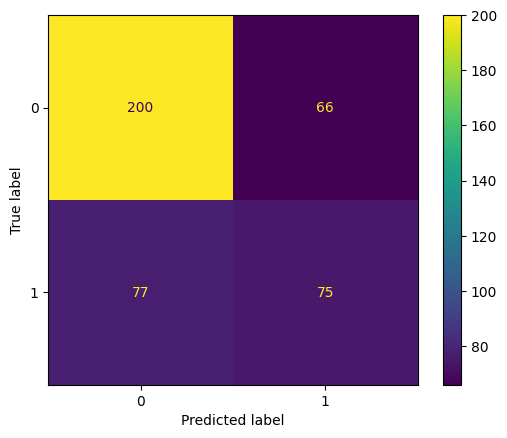

In [10]:
grid_knn = {
      'n_neighbors': [2, 3, 5, 7, 10, 12],
      'leaf_size': [15, 20, 30, 40, 50, 60],
      'weights': ["uniform", "distance"],
      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

def create_knn_model(parameters):
    return KNeighborsClassifier(n_neighbors=parameters['n_neighbors'],
                                  leaf_size=parameters['leaf_size'],
                                  weights=parameters['weights'],
                                  algorithm=parameters['algorithm'])

evaluate_model(grid_knn, create_knn_model)


There will be  2 for certainty of  0.96  that we found the right one.
{'var_smoothing': 1e-08} Test Accuracy: 0.90
0.8971291866028708
Acuratete pe test: 0.8971291866028708
{'var_smoothing': 1e-09} Test Accuracy: 0.90
0.8971291866028708
Best parameters are:  {'var_smoothing': 1e-08}
Best accuracy is:  0.8971291866028708
Accuracy: 0.792368125701459
F1 score: 0.7291361639824304
Recall: 0.7280701754385965
Precision: 0.7302052785923754


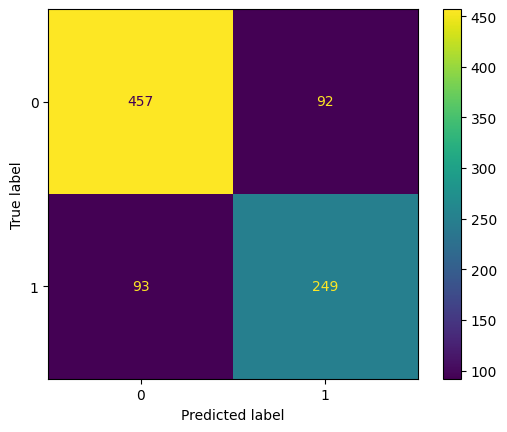

Testing results:
Accuracy: 0.8971291866028708
F1 score: 0.8700906344410876
Recall: 0.9473684210526315
Precision: 0.8044692737430168


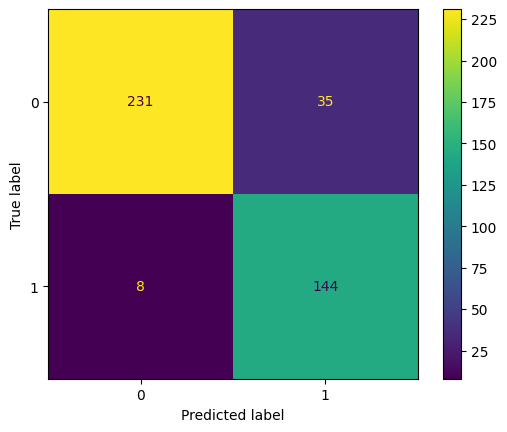

In [11]:
grid_gaussian = {
    "var_smoothing" : [1e-9, 1e-8, 1e-10]
}

def create_gaussianNB_model(parameters):
    return GaussianNB(var_smoothing=parameters['var_smoothing'])

evaluate_model(grid_gaussian, create_gaussianNB_model)